# Volume 4: Hysteresis
    Daniel Perkins
    MATH 437
    9/29/24

In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation
from scipy.optimize import newton
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation

In [2]:
def embedding_alg(lams, guess, F):
    xs = list()
    for lam in lams:
        try:
            # Solve for x_value making F(x_value, lam) = 0.
            x_value = newton(F, guess, args=(lam,), tol=1e-7)
            # Record the solution and update guess for the next iteration.
            xs.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values
            return lams[: len(xs)], xs
    # Return the list of parameters and the corresponding x values.
    return lams, xs

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

$x = λx − x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

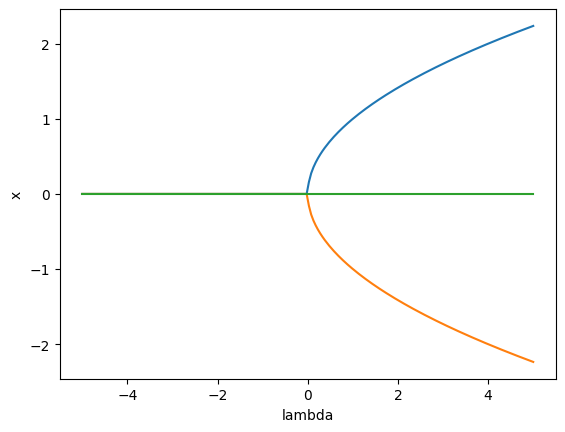

In [3]:
def F(x, lamb): return lamb*x - x**3

# Three different embedding algorithms (after a lot of trial and error)
lams1, xs1 = embedding_alg(np.linspace(5, -5, 200), 3, F)
lams2, xs2 = embedding_alg(np.linspace(5, -5, 200), -3, F)
lams3, xs3 = embedding_alg(np.linspace(5, -5, 200), 0, F)

# Plot it
plt.plot(lams1, xs1)
plt.plot(lams2, xs2)
plt.plot(lams3, xs3)
plt.xlabel("lambda")
plt.ylabel("x")
plt.show()

# Problem 2
Find the trajectory of $x' = \lambda x-x^3,$
using the points 

$(\lambda, x_0)\in \left\{\left(\frac{1}{2},\frac{1}{2}\right), \left(\frac{1}{2},\frac{-1}{2}\right), \left(\frac{-1}{2},\frac{1}{2}\right), \left(\frac{-1}{2},\frac{-1}{2}\right) \right\}. $

and the initial condition $x(0)=x_0$ using solve_ivp.
Be sure to include a legend.

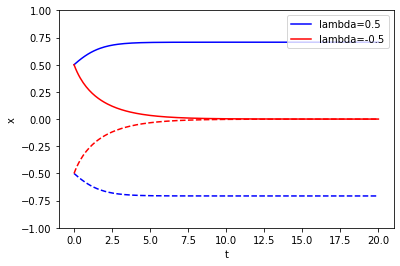

In [34]:
def F(lamb):   # Define function to work for arbitrary lambda
    def ode(t, y):
        return lamb*y - y**3
    return ode
t_span = (0,20) # the time domain
solutions = []

# solve the system for all hyperparemeters
for y0 in [1/2., -1/2.]:
    for lamb in [1/2., -1/2.]:
        sol = solve_ivp(F(lamb), t_span, np.array([y0]), max_step=0.1) # Solve it
        solutions.append(sol)

# Plot it
plt.plot(solutions[0].t,solutions[0].y[0], label=f"lambda=0.5", color="blue")
plt.plot(solutions[1].t,solutions[1].y[0], label=f"lambda=-0.5", color="red")
plt.plot(solutions[2].t,solutions[2].y[0], color="blue", linestyle='--')
plt.plot(solutions[3].t,solutions[3].y[0], color="red", linestyle='--')
plt.ylabel("x")
plt.xlabel("t")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

$\frac{dx}{dτ} = rx(1 − x/k) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$.
Be sure to include a legend.

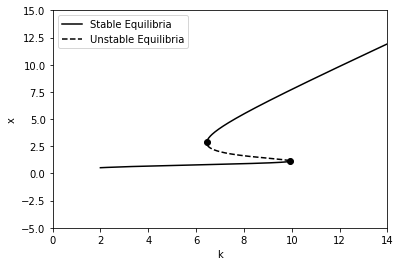

In [105]:
# Define function
r = 0.56
def F(x, k):
    return r*x*(1 - x/k) - (x**2)/(1 + x**2)

# Three different embedding algorithms (after a lot of trial and error)
lams1, xs1 = embedding_alg(np.linspace(6.45, 14, 200), 4, F)
lams2, xs2 = embedding_alg(np.linspace(9.93, 2, 200), 1, F)
lams3, xs3 = embedding_alg(np.linspace(9.93, 6.45, 200), 2, F)

# Plot it
plt.plot(lams1, xs1, "black", label="Stable Equilibria")
plt.scatter(lams1[0], xs1[0], color="black")
plt.plot(lams2, xs2, "black")
plt.scatter(lams2[0], xs2[0], color="black")
plt.xlim((0,14))
plt.ylim((-5,15))
plt.plot(lams3, xs3, "--k", label="Unstable Equilibria")
plt.xlabel("k")
plt.ylabel("x")
plt.legend()
plt.show()

# Problem 4
Using the time-dependent carrying-capacity

$k(t) = \begin{cases}
  8  & t \in [0,60) \\
  12  & t \in [60,150) \\
  8 & t \in [150,220) \\
  6 & t \in [220,300) \\
\end{cases},$

solve the IVP

$\frac{dx}{dτ} = rx(1 − x/k(t)) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$ and $x(0)=x_0=0.3.$
Be sure to include a legend.

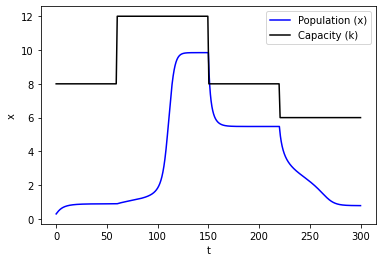

In [120]:
r = 0.56
def k(t):  # Piecewise function for k(t)
    if 0 <= t <60: return 8
    elif 60 <= t < 150: return 12
    elif 150 <= t < 220: return 8
    elif 220 <= t <= 300: return 6

def ode(t, x):
    left = r*x*(1 - x / k(t))
    right = x**2 / (1 + x**2)
    return left - right

t_span = (0, 300)
x_0 = np.array([0.3])

# solve the system for all hyperparemeters
sol = solve_ivp(ode, t_span, x_0, max_step=0.1) # Solve it

# Get ks
ts = np.linspace(0,300, 300)
ks = np.array([k(t) for t in ts])

# Plot it
plt.plot(sol.t, sol.y[0], color="blue", label="Population (x)")
plt.plot(ts, ks, color="black", label="Capacity (k)")
plt.ylabel("x")
plt.xlabel("t")
plt.legend()
plt.show()

# Problem 5

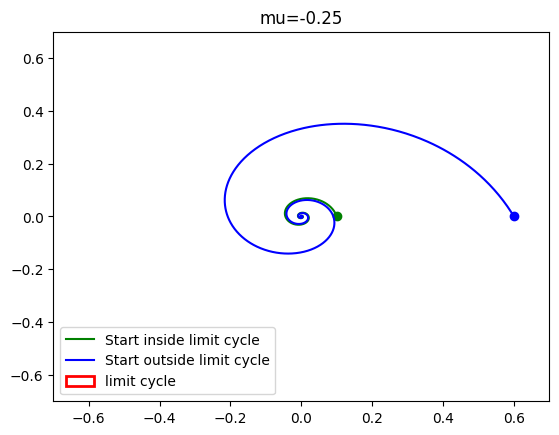

In [22]:
# View limits for plot.
xlim = -0.7, 0.7
ylim = -0.7, 0.7

# Define the ode
w, b = 1, 1
def ode(t, x, mu):
    r, theta = x
    r_prime = mu*r - r**3
    theta_prime = w + b*r**2
    return np.array([r_prime, theta_prime])
t_span = (0, 16*np.pi)

# Initial conditions
x0 = np.array([0.1, 0])
x1 = np.array([0.6, 0])

# Create a figure and axis object and set scales
fig, ax = plt.subplots(1, 1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Create empty line objects and the circle (for the limit cycle)
line0, = ax.plot([], [], 'g-', label="Start inside limit cycle")
dot0, = ax.plot([x0[0] * np.cos(x0[1])], [x0[0] * np.sin(x0[1])], 'go')  # Initial dot
line1, = ax.plot([], [], 'b-', label="Start outside limit cycle")
dot1, = ax.plot([x1[0] * np.cos(x1[1])], [x1[0] * np.sin(x1[1])], 'bo')  # Initial dot
circle = plt.Circle((0, 0), 0, color='r', fill=False, lw=2, label="limit cycle")
ax.add_artist(circle)

# Create a function to update line objects
def update(mu):
    ax.set_title(f"mu={round(mu,2)}")
    sol0 = solve_ivp(ode, t_span, x0, args=(mu,), max_step=0.01)
    sol1 = solve_ivp(ode, t_span, x1, args=(mu,), max_step=0.01)
    
    # Convert to cartesian coordinates
    sol_x = sol0.y[0] * np.cos(sol0.y[1])
    sol_y = sol0.y[0] * np.sin(sol0.y[1])
    sol_x1 = sol1.y[0] * np.cos(sol1.y[1])
    sol_y1 = sol1.y[0] * np.sin(sol1.y[1])
    
    line0.set_data(sol_x, sol_y)
    line1.set_data(sol_x1, sol_y1)
    if mu > 0:
        circle.set_radius(np.sqrt(mu))  # Set the new radius of the limit cycle
        circle.set_visible(True)  # Ensure the circle is visible
    else: circle.set_visible(False)  # Hide the circle when mu <= 0
        

interval = 100
ani = FuncAnimation(fig, update, frames=np.linspace(-.25, .25, 251), interval=interval)  # Create animation object.
ax.legend(loc="lower left")
ax.legend(loc="lower left")

ani.save('hopf.mp4')

<video src="hopf.mp4" controls>